# Data Science template - Titanic Case

Deze notebook begeleidt je stap voor stap door de **Titanic**-case op Kaggle.
De focus ligt op de standaard Data Science workflow:

1. Probleemdefinitie en doel
2. Data-input & Data cleaning
3. Verkenning (EDA)
4. Feature engineering
5. Modelleren (baseline → verbeterde modellen)
6. **Voorspelling** en export van `submission.csv`

> 🎯 Doel: voorspel de kans dat een passagier de Titanic-vaart heeft overleefd (`Survived`).

## 0. Doel & Omgevings-setup

- Download `train.csv` en `test.csv` handmatig van de Titanic-competitiepagina en plaats ze in een bijvoorbeeld in dezelfde map als dit bestand.


In [37]:
# !python --version


## 1. Imports

In [1]:
import pandas as pd
import numpy as np

# Visualisatie
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling & evaluatie
# import sklearn

# Hiermee laat je alle kolommen standaard zien
pd.set_option('display.max_columns', None)

## 2. Probleemdefinitie

- **Input**: passagiersgegevens zoals `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked`, etc.
- **Output**: binaire target `Survived` (0 = niet overleefd, 1 = overleefd).
- **Metric (Kaggle leaderboard)**: **Accuracy** op de testset (zonder labels).


## 3. Data inladen

In [2]:
# Je gaat werken met de train data. In de test data staan de Survived kolom niet ingevuld. Deze moet je dus zelf voorspellen.

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(train.shape, test.shape)
train.head()

(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4. Snelle datacheck & Preprocessing

Waar missen we (rijen met) data? Je kan missende data invullen door bijvoorbeeld voor bepaalde soort data op een bepaalde manier in te vullen:

- Numeriek: imputatie (median) + scaling
- Categorisch: imputatie (most_frequent) + one-hot encoding

In [7]:
display(train.sample(5, random_state=42))
display(train.describe(include='all'))
train.isna().mean().sort_values(ascending=False)[:10]

print(train.isna().sum())

train = train.dropna(subset = ["Age"])
test = test.dropna(subset = ["Age"])
#train['Age'].fillna(train['Age'].median(), inplace=True)
#test['Age'].fillna(test['Age'].median(), inplace=True)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.00,NaN,S
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.75,NaN,S
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.00,NaN,S
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.30,B35,C
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.45,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,714.000000,714.000000,714.000000,714,714,714.000000,714.000000,714.000000,714,714.000000,185,712
unique,NaN,NaN,NaN,714,2,NaN,NaN,NaN,542,NaN,134,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,453,NaN,NaN,NaN,7,NaN,4,554
mean,448.582633,0.406162,2.236695,NaN,NaN,29.699118,0.512605,0.431373,NaN,34.694514,NaN,NaN
std,259.119524,0.491460,0.838250,NaN,NaN,14.526497,0.929783,0.853289,NaN,52.918930,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,222.250000,0.000000,1.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,8.050000,NaN,NaN
50%,445.000000,0.000000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,15.741700,NaN,NaN
75%,677.750000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,1.000000,NaN,33.375000,NaN,NaN


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64


## 5. Verkennende Data Analyse (EDA)

> Tip: Voeg hier extra grafieken toe (bijv. histogrammen, boxplots, countplots per feature).


In [ ]:
# Voorbeeld: verdeling overleven per geslacht
pd.crosstab(train['Sex'], train['Survived'], normalize='index')


# Word misschien gebruikt
'''
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

def fam_bucket(fs):
    if fs == 1: 
        return "Alleen"
    elif 2 <= fs <= 4:
        return "Klein (2-4)"
    else:
        return "Groot (5+)"

train["FamilyGroup"] = train["FamilySize"].apply(fam_bucket)

# Survival rate per FamilyGroup
group_stats = (
    train.groupby("FamilyGroup")["Survived"]
         .agg(SurvivalRate="mean", PassengerCount="size")
         .reindex(["Alleen", "Klein (2-4)", "Groot (5+)"])  # logische volgorde
         .reset_index()
)

print(group_stats)  # tabel met resultaten

# Plot
plt.figure(figsize=(7,5))
ax = sns.barplot(data=group_stats, x="FamilyGroup", y="SurvivalRate")
ax.set_title("Overlevingskans: Alleen vs. met familie")
ax.set_xlabel("Familiegroep")
ax.set_ylabel("Gem. overlevingskans")

# aantallen boven de balken
for p, n in zip(ax.patches, group_stats["PassengerCount"]):
    ax.annotate(f"Aantal Passagiers={n}", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", xytext=(0, 3), textcoords="offset points")

plt.show()
'''

'\ntrain["FamilySize"] = train["SibSp"] + train["Parch"] + 1\n\ndef fam_bucket(fs):\n    if fs == 1: \n        return "Alleen"\n    elif 2 <= fs <= 4:\n        return "Klein (2-4)"\n    else:\n        return "Groot (5+)"\n\ntrain["FamilyGroup"] = train["FamilySize"].apply(fam_bucket)\n\n# Survival rate per FamilyGroup\ngroup_stats = (\n    train.groupby("FamilyGroup")["Survived"]\n         .agg(SurvivalRate="mean", PassengerCount="size")\n         .reindex(["Alleen", "Klein (2-4)", "Groot (5+)"])  # logische volgorde\n         .reset_index()\n)\n\nprint(group_stats)  # tabel met resultaten\n\n# Plot\nplt.figure(figsize=(7,5))\nax = sns.barplot(data=group_stats, x="FamilyGroup", y="SurvivalRate")\nax.set_title("Overlevingskans: Alleen vs. met familie")\nax.set_xlabel("Familiegroep")\nax.set_ylabel("Gem. overlevingskans")\n\n# aantallen boven de balken\nfor p, n in zip(ax.patches, group_stats["PassengerCount"]):\n    ax.annotate(f"Aantal Passagiers={n}", (p.get_x()+p.get_width()/2, p.get

<Figure size 640x480 with 0 Axes>

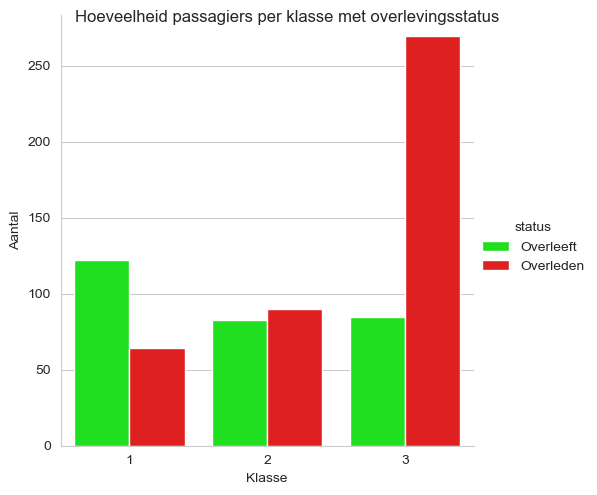

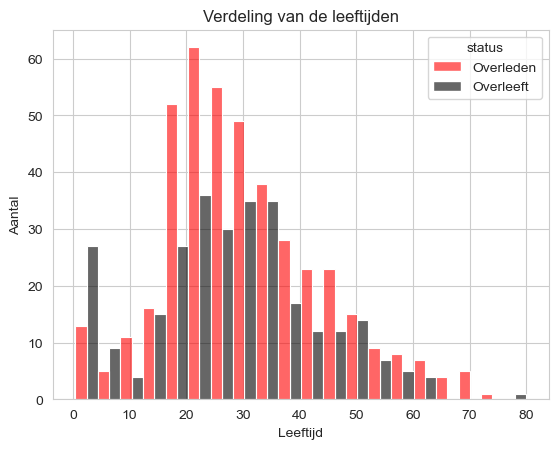

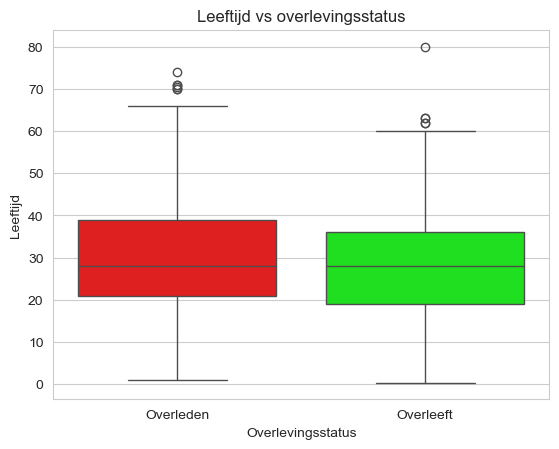

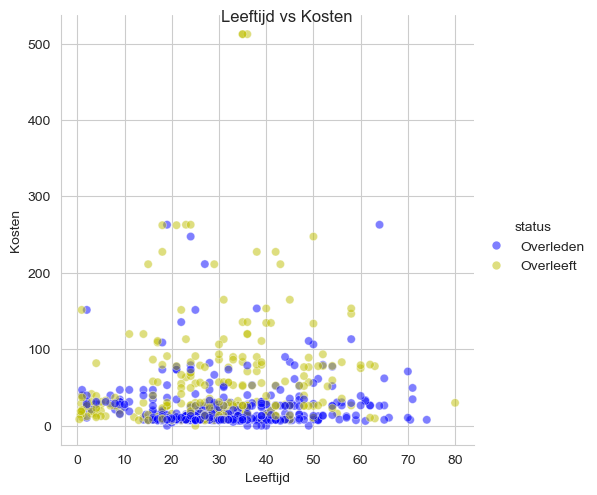

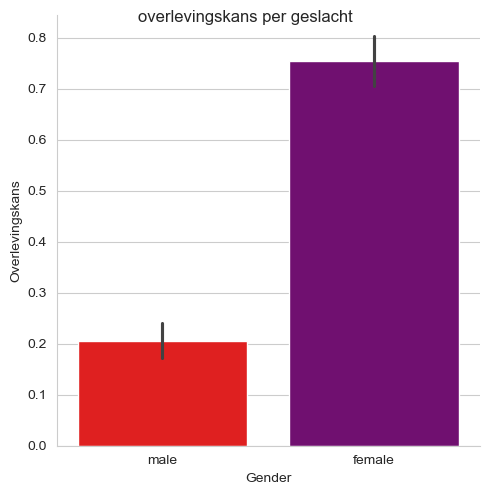

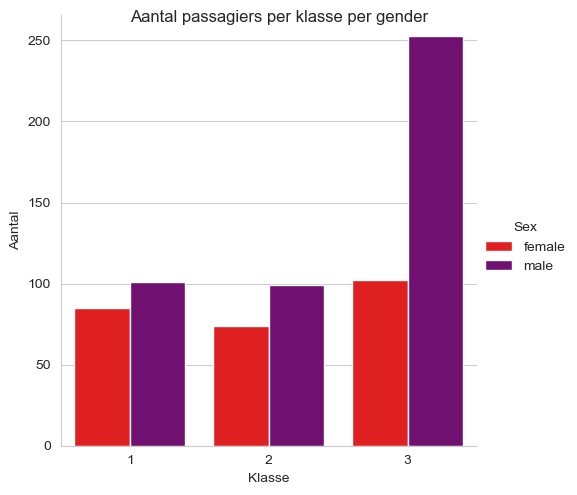

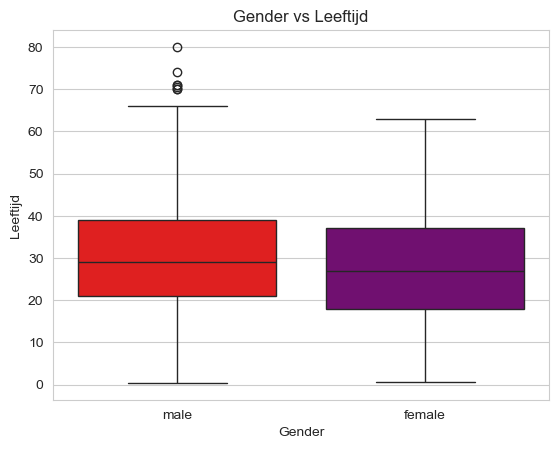

In [ ]:
# Voorbeeld: verdeling leeftijd (met eenvoudige imputatie voor visualisatie)
# we verwijderen simpelweg alle rijen waar geen leeftijd bekend is.
train["status"] = np.where(train["Survived"] == 1, "Overleeft", "Overleden")

plt.figure()
'''
sns.set_palette(["lime", "r"])
f = sns.catplot(kind = "count",x = "Pclass", hue = "status", data = train )
f.fig.suptitle("Hoeveelheid passagiers per klasse met overlevingsstatus")
f.set(xlabel = "Klasse", ylabel = "Aantal")
plt.show()

sns.set_palette(["r","black"])
k = sns.histplot(data=train,x="Age", hue="status",alpha = 0.6, multiple="dodge")
k.set_title("Verdeling van de leeftijden")
k.set_xlabel("Leeftijd")
k.set_ylabel("Aantal")
plt.show()

sns.set_palette(["r", "lime"])
n = sns.boxplot(data=train,x="status", y= "Age", hue = "status")
n.set_title("Leeftijd vs overlevingsstatus")
n.set_xlabel("Overlevingsstatus")
n.set_ylabel("Leeftijd")
plt.show()

sns.set_style("whitegrid")
sns.set_palette(["b","y"])
p = sns.relplot(data=train,x="Age",y="Fare",kind='scatter',hue="status",alpha=0.5)
p.fig.suptitle("Leeftijd vs Kosten")
p.set(xlabel = "Leeftijd", ylabel = "Kosten")

sns.set_palette(["r","purple"])
g = sns.catplot(data=train,x="Sex", y="Survived", kind="bar", hue ="Sex")
g.fig.suptitle("overlevingskans per geslacht")
g.set(xlabel = "Gender", ylabel = "Overlevingskans")

b = sns.catplot(data = train, x = "Pclass", hue = "Sex", kind = "count")
b.fig.suptitle("Aantal passagiers per klasse per gender")
b.set(xlabel = "Klasse", ylabel = "Aantal")
plt.show()


d = sns.boxplot( data = train, x = "Sex", y = "Age", hue = "Sex")
d.set_title("Gender vs Leeftijd")
d.set_xlabel("Gender")
d.set_ylabel("Leeftijd")
plt.show()

'''

In [43]:
# Oefening: voeg je eigen EDA toe
# Gebruik Seaborn in plaats van Matplotlib.
# TODO: tel bijvoorbeeld overlevingspercentage per Pclass, Embarked, Fare-quantiles (pd.qcut), etc.

## 6. Feature Engineering

Voeg hier zelf extra features toe (bijv. `Title` uit `Name`, `FamilySize = SibSp + Parch + 1`, indicatoren, etc.).

Zorg wel dat het relevant is voor je eigen onderzoek. Waar ligt je eigen focus.

In [44]:
# Je kan nu zelf features aanmaken invullen. 



## 7. Baseline model — np.where invullen

In [45]:
# === 3. Regelgebaseerde baseline met np.where ===
# Regel: vrouwen overleven altijd, jongens (<10 jaar) ook, anders niet
train_pred = np.where(
    train['Age'] <= 10,1, np.where(train["Age"] >= 65, 0, np.where(train["Pclass"] == 3, 0, np.where(train["Sex"] == "female", 1,0))))



## 8. Maak een eindmodel op volledige trainingsdata en voorspel op test

Hier kiezen we als voorbeeld het np.where model (of gebruik anders een ander model).


In [46]:
# === 4. Toepassen op testset ===
test_pred = np.where(
    test['Age'] <= 10,1, np.where(test["Age"] >= 65, 0, np.where(test["Pclass"] == 3, 0, np.where(test["Sex"] == "female", 1,0)))
      
)

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_pred.astype(int)
})

submission.to_csv("submission.csv", index=False)
print("submission.csv aangemaakt!")
submission.head() 

submission.csv aangemaakt!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## 9. Checklist & Volgende stappen

- [ ] Zorg dat er een duidelijke samenhang is tussen de grafieken -> Feature Engineering -> je uiteindelijke model! Dat is het belangrijkst.
- [ ] Laat geen grafieken zien waar je niks mee doet tijdens de presentatie.
- [ ] Zorg dat er dus een rode draad is in je verhaal. 

Voorbeeld: We hebben de focus gelegd op leeftijd -> EDA laat deze grafieken met leeftijd zien. We hebben met Feature Engineering nog leeftijdsgroepen aangemaakt -> We hebben in het model de leeftijden gebruikt. Dit is onze score.

- [ ] Eventueel EDA (een klein beetje) uitbreiden (meer grafieken, correlaties, outliers)
- [ ] Feature engineering verbeteren (wat is er relevant?)
- [ ] Meer modellen proberen (Logistic Regression? Sklearn)
- [ ] Submission inleveren op kaggle en kijken hoe goed je score is

Succes met de case!